In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [31]:
yt_df = pd.read_csv("USvideosv.csv")
yt_df.sample(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
16940,f3Xkre0GOFU,18.08.02,Florida ER nurse goes on epic rant about flu s...,WFLA News Channel 8,25,2018-02-01T18:40:01.000Z,"wflatampa|""wflanews""|""wflatampanews""",289826,11499,788,2365,https://i.ytimg.com/vi/f3Xkre0GOFU/default.jpg,False,False,False,Florida ER nurse goes on epic rant about flu s...
23680,AvFNCNOyZeE,18.14.03,Round Peg in a Square Hole - Numberphile,Numberphile,28,2018-03-05T12:30:00.000Z,"numberphile|""tadashi""|""square""|""round""|""hole""",570208,12219,148,529,https://i.ytimg.com/vi/AvFNCNOyZeE/default.jpg,False,False,False,Featuring Tadashi Tokieda - more Tadashi video...
19618,Ecd4eA067P0,18.22.02,Star Wars: The Last Jedi In-Home Trailer (Offi...,Star Wars,24,2018-02-20T14:00:00.000Z,"star wars|""the last jedi""|""blu-ray""|""trailer""|...",456262,18112,2410,4285,https://i.ytimg.com/vi/Ecd4eA067P0/default.jpg,False,False,False,Own your copy of Star Wars: The Last Jedi! Ava...
29097,b1Vi4YGMGkk,18.16.04,YouTube Shooting: Woman Identified As Nasim Ag...,CBS Los Angeles,25,2018-04-04T05:16:12.000Z,"KCAL 9 News Evening|""los angeles""|""youtube""|""t...",1690268,6518,2565,10736,https://i.ytimg.com/vi/b1Vi4YGMGkk/default.jpg,False,False,False,Her father told CBS2 News late Tuesday that he...
20454,3BHcVPSD4p0,18.26.02,WATCH LIVE: Florida Gov. Rick Scott announcing...,PBS NewsHour,25,2018-02-23T17:17:29.000Z,[none],11309,145,79,0,https://i.ytimg.com/vi/3BHcVPSD4p0/default.jpg,True,False,False,NaN


In [32]:
yt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [ ]:
# Dropping columns that we don't need
yt_df = yt_df.drop("video_id", axis=1)
yt_df = yt_df.drop("trending_date", axis=1)
yt_df = yt_df.drop("title", axis=1)
yt_df = yt_df.drop("channel_title", axis=1)
yt_df = yt_df.drop("category_id", axis=1)
yt_df = yt_df.drop("publish_time", axis=1)
yt_df = yt_df.drop("tags", axis=1)
yt_df = yt_df.drop("thumbnail_link", axis=1)
yt_df = yt_df.drop("description", axis=1)
yt_df = yt_df.drop("comments_disabled", axis=1)
yt_df = yt_df.drop("ratings_disabled", axis=1)
yt_df = yt_df.drop("video_error_or_removed", axis=1)

yt_df

,views,likes,dislikes,comment_count
0,748374,57527,2966,15954
1,2418783,97185,6146,12703
2,3191434,146033,5339,8181
3,343168,10172,666,2146
4,2095731,132235,1989,17518
...,...,...,...,...
40944,1685609,38160,1385,2657
40945,1064798,60008,382,3936
40946,1066451,48068,1032,3992
40947,5660813,192957,2846,13088


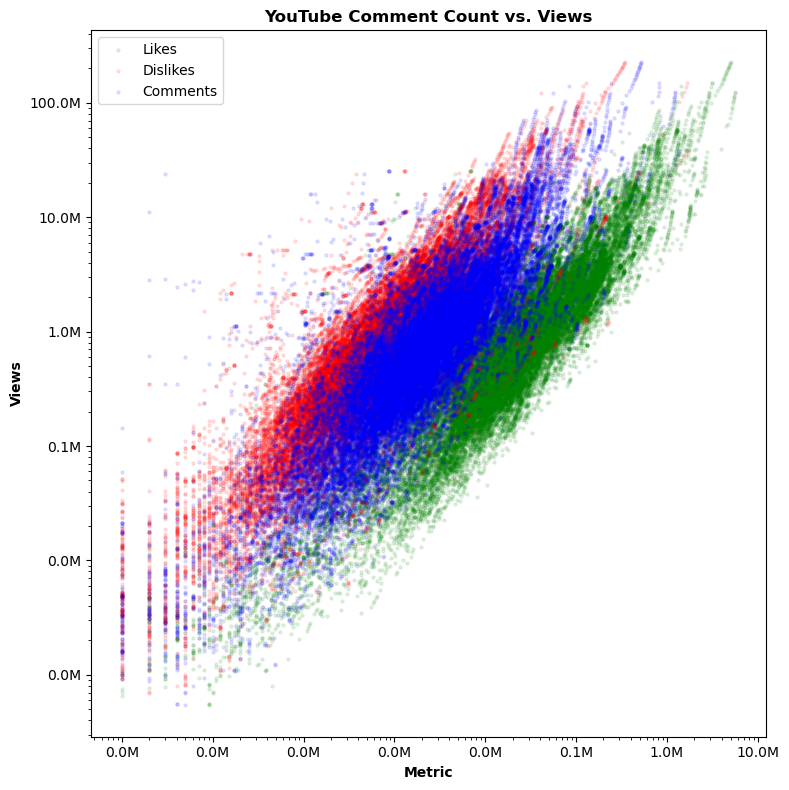

In [57]:
# Set up our figure
yt_scatter_fig, yt_scatter_ax = plt.subplots(figsize=(8, 8))

# Add Likes scatter
yt_scatter_ax.scatter(yt_df["likes"], yt_df["views"], color="green", s=5, alpha=0.1, label="Likes")
yt_scatter_ax.set_title("YouTube Likes vs. Views", weight="bold")

# Add Dislikes scatter
yt_scatter_ax.scatter(yt_df["dislikes"], yt_df["views"], color="red", s=5, alpha=0.1, label="Dislikes")
yt_scatter_ax.set_title("YouTube Dislikes vs. Views", weight="bold")

# Add Comment Count scatter
yt_scatter_ax.scatter(yt_df["comment_count"], yt_df["views"], color="blue", s=5, alpha=0.1, label="Comments")
yt_scatter_ax.set_title("YouTube Comment Count vs. Views", weight="bold")

# Scaling for viewability
yt_scatter_ax.set_xlabel("Metric", weight="bold")
yt_scatter_ax.set_ylabel("Views", weight="bold")
yt_scatter_ax.set_xscale("log")
yt_scatter_ax.set_yscale("log")

# Units
from matplotlib.ticker import FuncFormatter
yt_scatter_ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
yt_scatter_ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

# Finish up
plt.tight_layout()
plt.legend()
plt.show()